<a href="https://colab.research.google.com/github/Shibata18/DataSciencePandas/blob/master/5_12_An%C3%A1lise_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **5.12 - Análise temporal**



1.   Recuperação dos dados
Recuperar os dados de visualização sobre a cidade de Phoenix agrupados por dia, por mês e por ano;

2.   Ordenar as observações de forma ascendente temporalmente (da observação mais antiga para a observação mais recente).

1.  Visualização dos dados em forma de Série Temporal:
Observar o gráfico em barras da série temporal para o ano x de forma a investigar como se comporta a distribuição das visualizações.
2.   Observar o gráfico de linha da evolução do número de observações ao longo do tempo (anos)

1. Construção dos conjuntos de Treinamento e Teste:
Separar 70% das observações para treinamento e 30% das observações para teste (como se trata de uma informação temporal, não podemos pegar uma amostra aleatória, sugestão: calcular o índice que corresponde a 70% das observações e considerar da primeira amostra até ele para treinamento; e do índice seguinte até o final para teste).
1.   nvestigar os parâmetros para discriminar o melhor modelo:
Utilizando o pacote statsmodels, vamos testar uma família de métodos apropriados para lidar com previsão de séries temporais chamados conjuntamente de SARIMAX (Links para um site externo.), ou seja, utilize a função SARIMAX para criar um modelo;

2.   Em seguida, chame a função fit() para ajustar o modelo;
Para medir a qualidade do modelo ajustado, acesse a propriedade AIC do resultado (dica: o Critério de Informação de Akaike é uma métrica "quanto menor melhor", dessa forma, ao comparar modelos diferentes, aquele que possuir o menor valor de AIC é o melhor.
1. Exemplo de qualidade do modelo de acordo com o parâmetro AIC:
A qualidade do modelo estimada pelo AIC é: 1085.2222824883293
A última etapa é realizar uma previsão utilizando o melhor modelo:
2. Utilizando a função forecast sobre o modelo ajustado, faça uma previsão apropriada para a quantidade de dias que existem no seu conjunto de teste;
Calcule o erro médio e o desvio-padrão com relação ao seu conjunto de testes.
O erro médio foi de: 12.5 % e o desvio-padrão foi de: 44.45 %







In [74]:
import pandas as pd

In [75]:
ovnis_preparado = pd.read_csv('df_OVNI_preparado.csv')
ovnis_preparado

,City,State,Shape,Sight_day,Sight_month,Sight_time,Sight_date,Sight_weekday
0,Solomons Island,MD,Disk,22,9,20:00:00,1997-09-22,Segunda-feira
1,Annapolis,MD,Triangle,15,8,23:00:00,1998-08-15,Sábado
2,Chesapeak Bay,MD,Disk,26,10,20:00:00,1999-10-26,Terça-feira
3,Frederick,MD,Sphere,7,7,01:45:00,2000-07-07,Sexta-feira
4,Wheaton,MD,Triangle,1,10,20:00:00,2000-10-01,Domingo
...,...,...,...,...,...,...,...,...
54938,"Washington, D.C. (above I-295 bridge)",DC,Flash,13,3,05:40:00,2016-03-13,Domingo
54939,"Washington, D.C.",DC,Circle,12,4,01:30:00,2016-04-12,Terça-feira
54940,Washington,DC,Triangle,8,8,22:00:00,2016-08-08,Segunda-feira
54941,"Washington, D.C.",DC,Other,2,10,11:00:00,2016-10-02,Domingo


In [76]:
cidade_phoenix = ovnis_preparado[ovnis_preparado['City']=='Phoenix']
cidade_phoenix.sort_values(by='Sight_date')

,City,State,Shape,Sight_day,Sight_month,Sight_time,Sight_date,Sight_weekday
24043,Phoenix,AZ,Disk,12,6,02:30:00,1999-06-12,Sábado
24061,Phoenix,AZ,Changing,12,11,23:33:00,2001-11-12,Segunda-feira
24073,Phoenix,AZ,Cigar,31,5,13:00:00,2003-05-31,Sábado
24090,Phoenix,AZ,Light,21,2,18:00:00,2005-02-21,Segunda-feira
24091,Phoenix,AZ,Light,20,3,03:30:00,2005-03-20,Domingo
...,...,...,...,...,...,...,...,...
26019,Phoenix,AZ,Other,15,6,15:35:00,2017-06-15,Quinta-feira
26035,Phoenix,AZ,Oval,6,7,21:25:00,2017-07-06,Quinta-feira
26031,Phoenix,AZ,Fireball,26,7,04:20:00,2017-07-26,Quarta-feira
26050,Phoenix,AZ,Flash,4,8,21:15:00,2017-08-04,Sexta-feira


In [77]:
import pandasql

In [78]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Sight_date ,Count(*) as Views FROM cidade_phoenix  group by Sight_day,  Sight_month order by Sight_date 
'''
views_phoenix= pandasql.sqldf(query.lower(), locals())
views_phoenix

,Sight_date,views
0,2001-11-12,1
1,2003-05-31,1
2,2005-06-08,1
3,2005-10-15,2
4,2006-04-30,1
...,...,...
198,2017-06-15,2
199,2017-07-06,1
200,2017-07-26,2
201,2017-08-04,1


In [79]:
views_phoenix['Sight_date'] = pd.to_datetime(views_phoenix['Sight_date'])
views_phoenix.dtypes

Sight_date    datetime64[ns]
views                  int64
dtype: object

In [80]:
views_phoenix['Sight_year'] = views_phoenix['Sight_date'].dt.year
views_phoenix

,Sight_date,views,Sight_year
0,2001-11-12,1,2001
1,2003-05-31,1,2003
2,2005-06-08,1,2005
3,2005-10-15,2,2005
4,2006-04-30,1,2006
...,...,...,...
198,2017-06-15,2,2017
199,2017-07-06,1,2017
200,2017-07-26,2,2017
201,2017-08-04,1,2017


In [81]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year FROM views_phoenix  group by Sight_year 
'''
views_phoenix_per_year= pandasql.sqldf(query.lower(), locals())
views_phoenix_per_year

,views,Sight_year
0,1,2001
1,1,2003
2,2,2005
3,13,2006
4,5,2007
5,15,2008
6,14,2009
7,9,2010
8,6,2011
9,15,2012


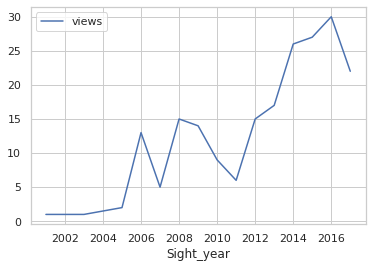

In [82]:
views_phoenix_per_year.plot.line(x='Sight_year',y='views')